In [37]:
import os
import sys
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
sys.path.append(parent_dir)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Valid data

In [39]:
# data = pd.read_csv(parent_dir + '/method/CR_FIQA/scores/valid/adaface_LFW.csv')
file_path = f"{parent_dir}/method/GraFIQs/scores/valid/resnet50/GraFIQs_image.txt"

# Wczytanie pliku do DataFrame
data = pd.read_csv(file_path, sep=" ", header=None, names=["img_path", "output_score"], engine='python')

# Jeśli ścieżka obrazu zawiera spacje, łączymy pierwsze kolumny
if data.shape[1] > 2:
    data["img_path"] = data.iloc[:, :-1].apply(lambda x: ' '.join(x.astype(str)), axis=1)
    data["output_score"] = data.iloc[:, -1]
    data = data[["img_path", "output_score"]]

In [40]:
data

,img_path,output_score
0,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0001.jpg,1.619060
1,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0002.jpg,0.842893
2,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0003.jpg,2.420825
3,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0004.jpg,0.961997
4,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0005.jpg,0.985438
...,...,...
5980,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,1.250680
5981,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,1.701607
5982,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,1.088717
5983,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,1.655659


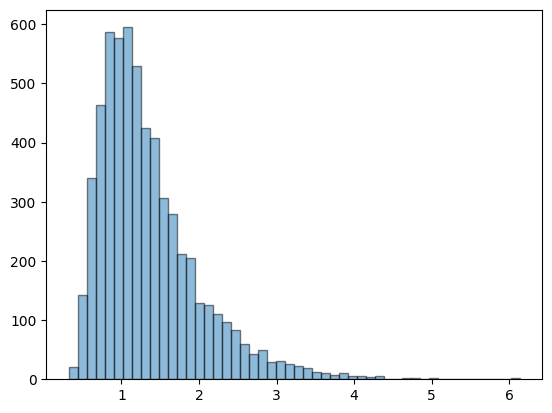

In [41]:
plt.hist(data['output_score'], bins=50, edgecolor='black', alpha=0.5)
plt.show()

In [42]:
under_5 = data[data['output_score'] < 0.8].sample(1)
bet_5_15 = data[(data['output_score'] >= 0.8) & (data['output_score'] < 1)].sample(1)
bet_15_30 = data[(data['output_score'] >= 1) & (data['output_score'] < 1.75)].sample(1)
bet_30_45 = data[(data['output_score'] >= 1.75) & (data['output_score'] < 2.5)].sample(1)
bet_45_60 = data[(data['output_score'] >= 2.5) & (data['output_score'] < 3.25)].sample(1)
bet_60_75 = data[(data['output_score'] >= 3.25) & (data['output_score'] < 5)].sample(1)

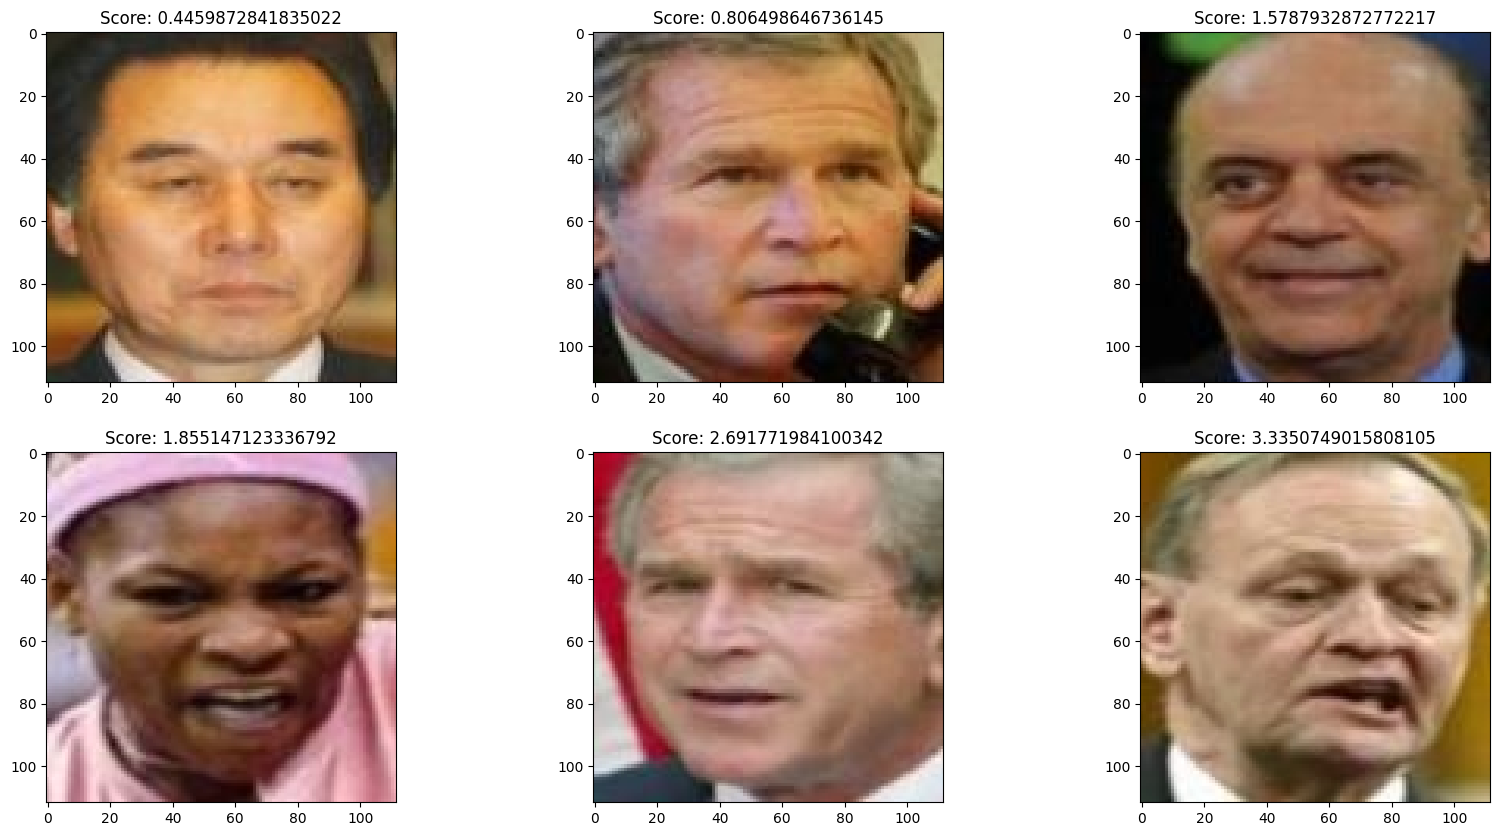

In [43]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
img = plt.imread(parent_dir + "/" + under_5['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(under_5['output_score'].values[0]))

plt.subplot(2, 3, 2)
img = plt.imread(parent_dir + "/" + bet_5_15['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(bet_5_15['output_score'].values[0]))

plt.subplot(2, 3, 3)
img = plt.imread(parent_dir + "/" + (bet_15_30['img_path'].values[0]))
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(bet_15_30['output_score'].values[0]))

plt.subplot(2, 3, 4)
img = plt.imread(parent_dir + "/" + bet_30_45['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(bet_30_45['output_score'].values[0]))

plt.subplot(2, 3, 5)
img = plt.imread(parent_dir + "/" + bet_45_60['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(bet_45_60['output_score'].values[0]))

plt.subplot(2, 3, 6)
img = plt.imread(parent_dir + "/" + bet_60_75['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(bet_60_75['output_score'].values[0]))

plt.show()



In [44]:
thresholds = np.linspace(1, 3, 100)

In [45]:
valid_emb = pd.read_csv(parent_dir + '/mgr_data/embeddings/adaface_LFW_embeddings.csv')
valid_emb["path"] = valid_emb["path"].str.replace("/", "\\", regex=False)

In [46]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from face_models.model import load_model
import ast

In [47]:
model = load_model("adaface")

d:\mgr\face_models\models\AdaFace\inference.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  statedict = torch.load(adaface_models[architecture])['state_dict']


In [48]:
fars = []
frrs = []
accs = []
f1s = []
precs = []
recs = []


In [49]:
from tqdm import tqdm

In [50]:
data

,img_path,output_score
0,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0001.jpg,1.619060
1,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0002.jpg,0.842893
2,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0003.jpg,2.420825
3,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0004.jpg,0.961997
4,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0005.jpg,0.985438
...,...,...
5980,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,1.250680
5981,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,1.701607
5982,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,1.088717
5983,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,1.655659


In [51]:
valid_emb

,embedding,label,path
0,"[0.009997721761465073, 0.026522330939769745, 0...",411,mgr_data\LFW\William_Macy\William_Macy_0001.jpg
1,"[0.049328647553920746, -0.040568508207798004, ...",274,mgr_data\LFW\Mike_Myers\Mike_Myers_0001.jpg
2,"[-0.044635988771915436, 0.05044694244861603, -...",185,mgr_data\LFW\John_Allen_Muhammad\John_Allen_Mu...
3,"[-0.07373926043510437, -0.034276507794857025, ...",195,mgr_data\LFW\John_Snow\John_Snow_0013.jpg
4,"[-0.032401129603385925, -0.0071623967960476875...",79,mgr_data\LFW\Colin_Powell\Colin_Powell_0202.jpg
...,...,...,...
5980,"[0.04737282171845436, -0.05571756139397621, 0....",325,mgr_data\LFW\Richard_Gephardt\Richard_Gephardt...
5981,"[-0.04054786264896393, -0.033947914838790894, ...",208,mgr_data\LFW\Julie_Gerberding\Julie_Gerberding...
5982,"[-0.026741210371255875, 0.0723222866654396, 0....",390,mgr_data\LFW\Tommy_Thompson\Tommy_Thompson_000...
5983,"[0.03142119199037552, 0.06697788089513779, 0.0...",120,mgr_data\LFW\George_W_Bush\George_W_Bush_0164.jpg


In [52]:
num_data = len(data)
data_percent = []

In [53]:
for t in tqdm(thresholds):
    choices = data[data['output_score'] < t]
    data_percent.append(1- (len(choices) / num_data))
    embeddings = valid_emb[valid_emb['path'].isin(choices['img_path'])]
    labels = embeddings['label'].values
    emb = embeddings['embedding'].values
    emb = np.array([np.array(ast.literal_eval(e)) for e in emb])
    
    score = model.compute_similarities(emb, emb)

    labels_matrix = np.equal(labels[:, None], labels)
    upper_triangle_indices = np.triu_indices_from(score, k=1)
    class_labels = labels_matrix[upper_triangle_indices]
    scores = score[upper_triangle_indices]

    ground_truth = class_labels
    decisions = scores > 0.137111
    acc = accuracy_score(ground_truth, decisions)
    f1 = f1_score(ground_truth, decisions)
    prec = precision_score(ground_truth, decisions)
    rec = recall_score(ground_truth, decisions)
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)
    fars.append(FAR)
    frrs.append(FRR)
    accs.append(acc)
    f1s.append(f1)
    precs.append(prec)
    recs.append(rec)

100%|██████████| 100/100 [26:15<00:00, 15.76s/it]


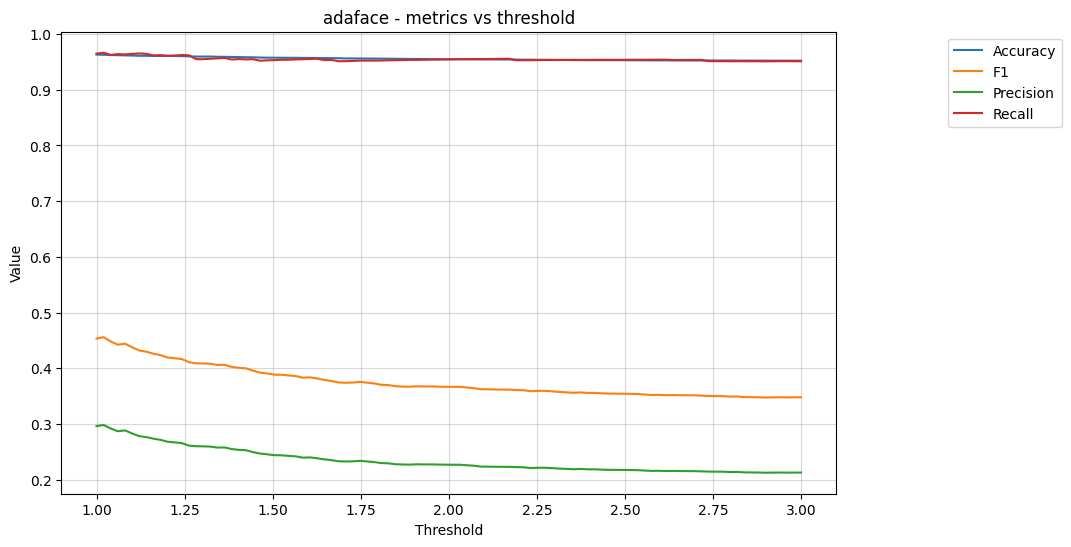

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accs, label='Accuracy')
plt.plot(thresholds, f1s, label='F1')
plt.plot(thresholds, precs, label='Precision')
plt.plot(thresholds, recs, label='Recall')
# plt.axvline(x=0.24, color='r', linestyle='--', label='Threshold = 0.24')
plt.title('adaface - metrics vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(alpha=0.5)

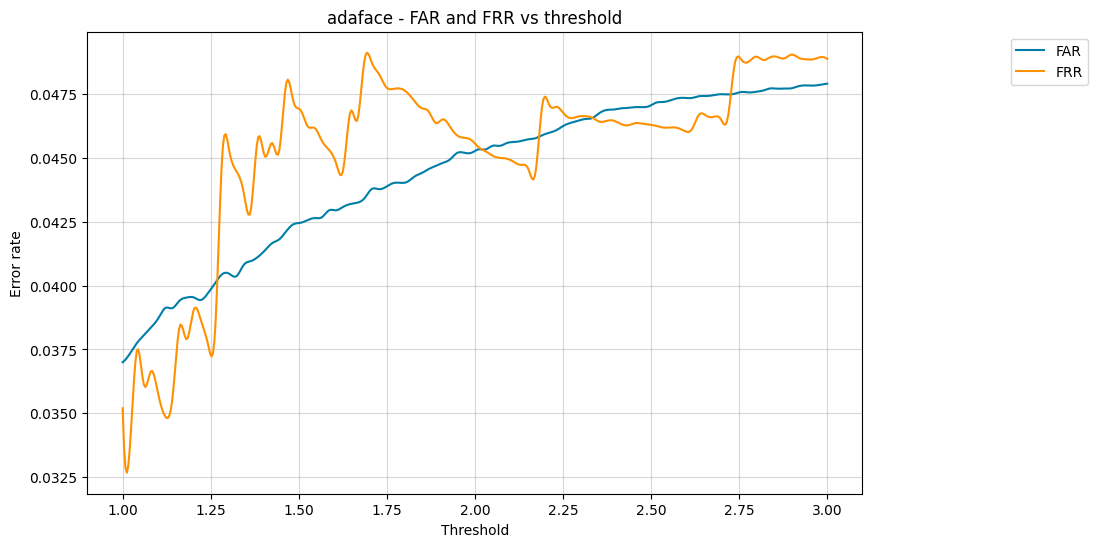

In [55]:
from scipy.interpolate import make_interp_spline
new_fars = make_interp_spline(thresholds, fars)
X_ = np.linspace(np.min(thresholds), np.max(thresholds), 500)
Y_ = new_fars(X_)
plt.figure(figsize=(10, 6))
plt.plot(X_, Y_, label='FAR', color='#007EA7')

new_frrs = make_interp_spline(thresholds, frrs)
Y_ = new_frrs(X_)
plt.plot(X_, Y_, label='FRR', color= '#FF9000')
plt.title('adaface - FAR and FRR vs threshold')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.grid(alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# plt.figure(figsize=(10, 6))
# plt.plot(thresholds, fars, label='FAR')
# plt.plot(thresholds, frrs, label='FRR')
# plt.title('adaface - FAR and FRR vs threshold')
# plt.xlabel('Threshold')
# plt.ylabel('Error rate')
# plt.grid(alpha=0.5)
# plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

Tutaj taki wygląd jest pożdany, bo czym wyższy threshold tym więcej danych - słabej jakości - przepuszczamy

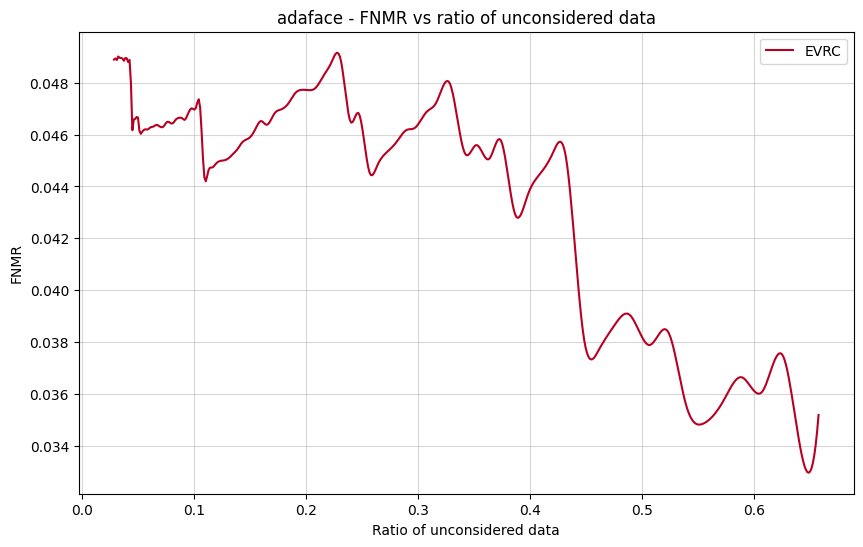

In [56]:
new_evrc = make_interp_spline(data_percent[::-1], frrs[::-1])
X_ = np.linspace(np.min(data_percent), np.max(data_percent), 500)
Y_ = new_evrc(X_)
plt.figure(figsize=(10, 6))
plt.plot(X_, Y_, color ='#B80022', label='EVRC')
plt.title('adaface - FNMR vs ratio of unconsidered data')
plt.xlabel('Ratio of unconsidered data')
plt.ylabel('FNMR')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.5)


In [57]:
from sklearn.metrics import auc
auc_value = auc(data_percent[::-1], frrs[::-1])
print(auc_value)

0.027012848937732085


In [58]:
print(X_[:5])
print(Y_[:5])

[0.02823726 0.02949793 0.03075859 0.03201926 0.03327993]
[0.04888727 0.04893219 0.04887239 0.04900644 0.04895402]


In [59]:
import pickle
evrc = np.stack((X_, Y_))

with open(parent_dir + '/notebooks/quality/connected/grafiqs_resnet50_evrc.pkl', 'wb') as f:
    pickle.dump(evrc, f)


# Test data

In [60]:
test_emb = pd.read_csv(parent_dir + '/mgr_data/embeddings/adaface_IJBC_cut_embeddings.csv')
test_data = pd.read_csv(parent_dir + '/method/CR_FIQA/scores/test/adaface_IJBC.csv')
test_emb["path"] = test_emb["path"].str.replace("/", "\\", regex=False)

In [61]:
choices = test_data[test_data['output_score'] < 0.1]
embeddings = test_emb[test_emb['path'].isin(choices['img_path'])]
labels = embeddings['label'].values
emb = embeddings['embedding'].values
emb = np.array([np.array(ast.literal_eval(e)) for e in emb])

score = model.compute_similarities(emb, emb)

labels_matrix = np.equal(labels[:, None], labels)
upper_triangle_indices = np.triu_indices_from(score, k=1)
class_labels = labels_matrix[upper_triangle_indices]
scores = score[upper_triangle_indices]

ground_truth = class_labels
decisions = scores > 0.137111
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)

In [62]:
thresholds = np.linspace(-0.3, 1, 131)

In [63]:
fars = []
frrs = []

In [64]:
choices = test_data[test_data['output_score'] > 0.4]
for t in thresholds:
    embeddings = test_emb[test_emb['path'].isin(choices['img_path'])]
    labels = embeddings['label'].values
    emb = embeddings['embedding'].values
    emb = np.array([np.array(ast.literal_eval(e)) for e in emb])

    score = model.compute_similarities(emb, emb)

    labels_matrix = np.equal(labels[:, None], labels)
    upper_triangle_indices = np.triu_indices_from(score, k=1)
    class_labels = labels_matrix[upper_triangle_indices]
    scores = score[upper_triangle_indices]

    ground_truth = class_labels
    decisions = scores > t
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    far = FP / (FP + TN)
    frr = FN / (FN + TP)
    fars.append(far)
    frrs.append(FRR)

In [65]:
from utils.utils import calculate_eer
thres, eer = calculate_eer(thresholds, fars, frrs)

In [66]:
results_json = {}
results_json['valid'] = {}
results_json['test'] = {}
results_json['valid']['auc'] = auc_value
results_json['test']['acc'] = acc
results_json['test']['f1'] = f1
results_json['test']['prec'] = prec
results_json['test']['rec'] = rec
results_json['test']['FAR'] = FAR
results_json['test']['FRR'] = FRR
results_json['test']['eer'] = eer


In [67]:
results_json

{'valid': {'auc': 0.027012848937732085},
 'test': {'acc': 0.5726754778230482,
  'f1': 0.043308984389484224,
  'prec': 0.02220616753488726,
  'rec': 0.8716417910447761,
  'FAR': 0.43067930595565085,
  'FRR': 0.12835820895522387,
  'eer': 0.12835820895522387}}

In [68]:
import json
with open(parent_dir + '/mgr_data/quality_results/grafiqs_resnet50_results.json', 'w') as f:
    json.dump(results_json, f, indent=4)

In [69]:
print(f"""
Accuracy: {acc}
F1: {f1}
Precision: {prec}
Recall: {rec}
FAR: {FAR}
FRR: {FRR}
      """)


Accuracy: 0.5726754778230482
F1: 0.043308984389484224
Precision: 0.02220616753488726
Recall: 0.8716417910447761
FAR: 0.43067930595565085
FRR: 0.12835820895522387
      
